In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Pacotes de Machine Leaning 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [3]:
# Pacotes de Estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Um exemplo simples

In [4]:
X = 3 * np.random.rand(100, 1)
theta_0 = 4
theta_1 = 3
Y = theta_0 + theta_1 * X + np.random.randn(100, 1)

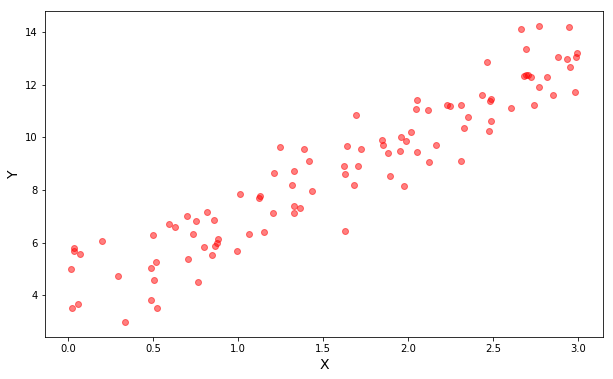

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, c="r", alpha=0.5)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.show()

## Estimar os parâmetros usando a formula da regressão linear

In [6]:
# Usando a fórmula 
y_bar = np.mean(Y)
x_bar = np.mean(X)
m = np.concatenate((X, Y), axis=1)
covXY = np.cov(m,rowvar=False)[0][1]
varX = np.cov(m,rowvar=False)[0][0]
theta_1_est = covXY/varX
theta_0_est = y_bar - theta_1*x_bar
y_hat = theta_0 + theta_1*X
print('O intercepto estimado foi %.3f' %theta_0_est)
print('A inclinação estimada foi %.3f' %theta_1_est)

O intercepto estimado foi 3.975
A inclinação estimada foi 3.018


### Criando os valores previstos

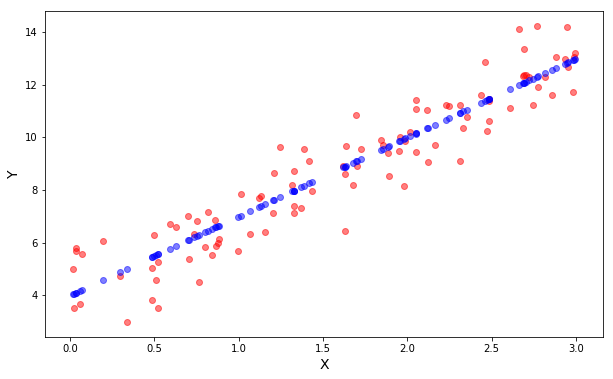

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X, Y, c="r", alpha=0.5)
plt.scatter(X, y_hat, c="b", alpha=0.5)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.show()

## Estimando usando Sklearn

In [8]:
regression = LinearRegression()
regression.fit(X,Y)
new_theta_0 = regression.intercept_
new_theta_1 = regression.coef_
print('O intercepto estimado foi %.3f' %new_theta_0)
print('A inclinação estimada foi %.3f' %new_theta_1)


O intercepto estimado foi 3.947
A inclinação estimada foi 3.018


# Exemplo de diabetes

In [9]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [10]:
data = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
data['target'] = diabetes['target']
print(data.shape)
features = ['age','sex','bmi','bp']
y_var = ['target']
data[features + y_var].head()

(442, 11)


,age,sex,bmi,bp,target
0,0.038076,0.050680,0.061696,0.021872,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,75.0
2,0.085299,0.050680,0.044451,-0.005671,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,206.0
4,0.005383,-0.044642,-0.036385,0.021872,135.0


# Examplo Statsmodel 

In [11]:
mod = smf.ols(formula='target ~ age + sex + bmi + bp', data=data)
reg = mod.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     72.91
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           2.70e-47
Time:                        21:26:25   Log-Likelihood:                -2434.2
No. Observations:                 442   AIC:                             4878.
Df Residuals:                     437   BIC:                             4899.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.853     53.329      0.0

# Using Sklearn

In [12]:
X = data[features].copy()
y = data[y_var].copy()
# Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Splitting train between train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=80,
                                                  random_state=42)

In [13]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(273, 4)
(80, 4)
(89, 4)


## Usando Linear Regression

In [14]:
regression = LinearRegression()
regression.fit(X_train,y_train)
predict_train = regression.predict(X_train)
predict_test = regression.predict(X_test)
print('R2 da regressão no conjunto treino foi %.5f' %r2_score(y_train,predict_train))
print('R2 da regressão no conjunto teste foi %.5f' %r2_score(y_test,predict_test))

R2 da regressão no conjunto treino foi 0.41802
R2 da regressão no conjunto teste foi 0.29013


## Usando Lasso

In [15]:
punicao = 0.01
lasso = Lasso(alpha=punicao)
lasso.fit(X_train,y_train)
predict_train = lasso.predict(X_train)
predict_test = lasso.predict(X_test)
print('R2 da regressão Lasso no conjunto treino foi %.5f' %r2_score(y_train,predict_train))
print('R2 da regressão Lasso no conjunto teste foi %.5f' %r2_score(y_test,predict_test))

R2 da regressão Lasso no conjunto treino foi 0.41800
R2 da regressão Lasso no conjunto teste foi 0.29113


## Escolhendo a melhor taxa de punição

In [16]:
punicoes_base10 = -np.linspace(0, 10, num=40, endpoint=True)
punicoes = np.exp(punicoes_base10)
punicoes

array([1.00000000e+00, 7.73824437e-01, 5.98804260e-01, 4.63369369e-01,
       3.58566541e-01, 2.77467552e-01, 2.14711172e-01, 1.66148752e-01,
       1.28569965e-01, 9.94905805e-02, 7.69882425e-02, 5.95753834e-02,
       4.61008875e-02, 3.56739933e-02, 2.76054078e-02, 2.13617392e-02,
       1.65302358e-02, 1.27915004e-02, 9.89837561e-03, 7.65960493e-03,
       5.92718948e-03, 4.58660406e-03, 3.54922631e-03, 2.74647805e-03,
       2.12529183e-03, 1.64460275e-03, 1.27263380e-03, 9.84795135e-04,
       7.62058541e-04, 5.89699522e-04, 4.56323901e-04, 3.53114586e-04,
       2.73248695e-04, 2.11446518e-04, 1.63622483e-04, 1.26615076e-04,
       9.79778397e-05, 7.58176466e-05, 5.86695477e-05, 4.53999298e-05])

In [17]:
melhor_resultado_val = -np.inf
melhor_punicao = None
for punicao in punicoes:
    lasso = Lasso(alpha=punicao)
    lasso.fit(X_train,y_train)
    previsao_val = lasso.predict(X_val)
    r2_val = r2_score(y_val,previsao_val)
    print('Punicao %.5f: R2-validacao = %.5f' %(punicao,r2_val))
    if r2_val >= melhor_resultado_val:
        melhor_punicao = punicao
        melhor_resultado_val = r2_val

Punicao 1.00000: R2-validacao = 0.28726
Punicao 0.77382: R2-validacao = 0.33689
Punicao 0.59880: R2-validacao = 0.36616
Punicao 0.46337: R2-validacao = 0.38333
Punicao 0.35857: R2-validacao = 0.39334
Punicao 0.27747: R2-validacao = 0.39913
Punicao 0.21471: R2-validacao = 0.40097
Punicao 0.16615: R2-validacao = 0.40083
Punicao 0.12857: R2-validacao = 0.40002
Punicao 0.09949: R2-validacao = 0.39880
Punicao 0.07699: R2-validacao = 0.39749
Punicao 0.05958: R2-validacao = 0.39627
Punicao 0.04610: R2-validacao = 0.39519
Punicao 0.03567: R2-validacao = 0.39428
Punicao 0.02761: R2-validacao = 0.39353
Punicao 0.02136: R2-validacao = 0.39292
Punicao 0.01653: R2-validacao = 0.39243
Punicao 0.01279: R2-validacao = 0.39205
Punicao 0.00990: R2-validacao = 0.39174
Punicao 0.00766: R2-validacao = 0.39150
Punicao 0.00593: R2-validacao = 0.39131
Punicao 0.00459: R2-validacao = 0.39117
Punicao 0.00355: R2-validacao = 0.39105
Punicao 0.00275: R2-validacao = 0.39096
Punicao 0.00213: R2-validacao = 0.39089


In [18]:
melhor_punicao

0.2147111723416973

In [19]:
punicao = melhor_punicao
lasso = Lasso(alpha=punicao)
lasso.fit(X_train,y_train)
predict_train = lasso.predict(X_train)
predict_test = lasso.predict(X_test)
print('R2 da regressão Lasso com a melhor punição no conjunto treino = %.5f' %r2_score(y_train,predict_train))
print('R2 da regressão Lasso com a melhor punição no conjunto treino = %.5f' %r2_score(y_test,predict_test))

R2 da regressão Lasso com a melhor punição no conjunto treino = 0.40729
R2 da regressão Lasso com a melhor punição no conjunto treino = 0.30050
